# CSC421 Spring 2022 Assignment 3 
### Author: George Tzanetakis 

This notebook is based on the topics covered in **Chapter 12 - Quantifying Uncertainty **, **Chapter 13 Probabilistic Reasoning** , and **Chapter 14 Probabistic Reasoning over time** from the book *Artificial Intelligence: A Modern Approach.*  You are welcome and actually it can be educational to look at the code at the aima-code repository as well as other code resources you can find on the web. However, make sure you understand any code that you incoporate. 

The assignment structure is as follows - each item is worth 2 points: 

1. Snakes and ladder simulation (Basic) - basic rolling and movement simulation, no ladders/snakes 
2. Snakes and ladder simulation (Basic) - multiple simulations and recording of number of rolls 
3. Snakes and ladder simulation (Expected) - adding of user-specified ladders/snakes 
4. Snakes and ladder simulation (Expected) - simulation to determine probability distribution of number of rolls 
5. Snakes and ladder simulation (Advanced) - exact inference + simulation with different ending rules 
6. Specifying a bayesian network (Basic) 
7. Inference on a bayesian network (Expected) 
8. Specifying a Hidden Markov Model (Basic) 
9. Inference and estimation using HMM (Expected) 
10. HMM with continuous observations (Gaussian Mixture Model) for location tracking (Advanced) 


The grading will be done in 1 increments. 1 point for correct answer, 1 points for partial or incorrect but reasonable answer and 0 for no answer or completely wrong answer. 


# Introduction 

This question uses the board game of snakes and ladders to explore the concepts behind probability, 
stochastic simulation as well as exact and approximate inference. I assume that most of you are familiar 
with snakes and ladders. If you need a refresher check the following link: 

https://www.ymimports.com/pages/how-to-play-snakes-and-ladders




# Question 1 (Basic)  - 2 point

Your first task will be to write a simple movement simulator on a snakes and ladders board. 
For this question you can ignore the snakes and ladders and just simply assume you only 
have to deal with moving. You will need to simulate rolling the die - this can be done 
by using the Python *random* module and the *randint* method. Your function *play_game* 
will take as input the length of the board (an integer), "play" the game by rolling the die 
multiple times until the sum of rolls is larger or equal to the length of the board.  (note: 
this is one of the possible and simplest end rules). The function should return the total 
number of rolls required to finish the the particular game that was played. Obviously 
this number will vary as it depends on the specific random rolls performed during the movement 
simulation. 






In [51]:
# YOUR CODE GOES HERE 
import matplotlib.pyplot as plt
import random
import numpy
import os
from tabulate import tabulate

def play_game(length:int)->int:
    counter=0
    current=1
    while current < length:
        die = random.randint(1,6)
        current+=die
        
        counter+=1

    return counter

length=100
print('length:',length,'number of rolls:',play_game(length))

length: 100 number of rolls: 27


# Question 2 (Basic) - 2 point

Your next task is to collect information about the probability distribution of number of rolls using the *play_game* function you implemented in the previous subquestion. Simulate playing the game 1000 times with a board length of 100 and record the number of rolls for each simulation. Show the histogram of the number of rolls for this simulation. You don't need to plot the histogram but can simply show the counts for each number of rolls as text. You can also create a plot using either the *matplotlib* or *bokeh* plotting frameworks. Make sure you include appropriate pip install and import statements in your notebook and check that it works in the Jupyterhub of the course. 



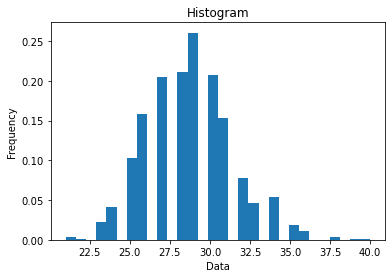

In [52]:
# YOUR CODE GOES HERE 
length=100
result_list=[]
for i in range(1000):
    result= play_game(length)
    result_list.append(result)


plt.hist(result_list, density=True, bins=30)
plt.ylabel("Frequency")
plt.xlabel("Data")
plt.title("Histogram");

# Question 3 (Expected) 2 points 

Extent your *play_game* method to take as input a specification of snake and ladder positions and then perform the appropriate movement simulation. Just as before playing the game returns the number of rolls required to finish the game using the same simple end rule as the previous subquestions. 

<img src="snakes_ladders.png" width="50%"/>

The snake and ladders positions will be encoded as a list of tuples. If the first number of the tuple is smaller than the second one it is ladder otherwise it is a snake. For example two of the snakes and one of the ladders
in the board above would be represented as: 

In [53]:
snakeA = (34,6)
snakeB = (32,10)
ladderC = (1,38)
snake_ladder_list = [snakeA,snakeB,ladderC]
print(snake_ladder_list)

[(34, 6), (32, 10), (1, 38)]


Your play game function should take as input the snake and ladder specification. For testing and experiments use the board provided in the image above. 

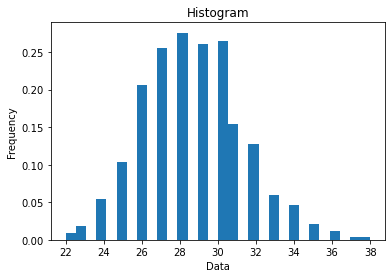

In [54]:
# YOUR CODE GOES HERE 


def is_snake(snake_or_ladder)->bool:
    if snake_or_ladder[0] > snake_or_ladder[1]:
        return True
    return False

#1=snake head
#2=snake tail
#3=ladder head
#4=ladder tail
def row_col_to_fit_matrix(row:int, col:int):
    row-=1
    if row%2==1:
        col-=1
    return row,col

def get_row_col(snake_or_ladder:int):
    side = int(length**(0.5))
    row= side - (snake_or_ladder-1)//side
    if row%2==0:
        col = snake_or_ladder % side
    else:
        col = side - snake_or_ladder % side
    return row,col

def play_game_extended(length:int, snake_ladder_list)->int:
    ladder_dict={}
    snake_dict={}
    #goal = length*length
    side = int(length**(0.5))
    board = numpy.zeros([side,side])
    while snake_ladder_list:
        snake_or_ladder = snake_ladder_list.pop()
        if is_snake(snake_or_ladder):
            snake_dict[snake_or_ladder[0]]=snake_or_ladder[1]
            head_row, head_col = get_row_col(snake_or_ladder[0])
            head_row, head_col = row_col_to_fit_matrix(head_row, head_col)
            tail_row, tail_col = get_row_col(snake_or_ladder[1])
            #print("snake:",tail_row, tail_col)
            tail_row, tail_col = row_col_to_fit_matrix(tail_row, tail_col)
            board[head_row][head_col] = 1
            board[tail_row][tail_col] = 2
        else:
            ladder_dict[snake_or_ladder[0]]=snake_or_ladder[1]
            tail_row, tail_col = get_row_col(snake_or_ladder[0])
            tail_row, tail_col = row_col_to_fit_matrix(tail_row, tail_col)
            head_row, head_col = get_row_col(snake_or_ladder[1])
            head_row, head_col = row_col_to_fit_matrix(head_row, head_col)
            board[head_row][head_col] = 3
            board[tail_row][tail_col] = 4
    #print(board)

    counter=0
    current= 1 #[length-1, 0]
    while current < length:
        die = random.randint(1,6)
        current+=die
        if current in ladder_dict:
            current = ladder_dict[current]
        elif current in snake_dict:
            current = snake_dict[current]

        counter+=1

    return counter

snakeA = (34,6)
snakeB = (32,10)
ladderC = (1,38)
snake_ladder_list = [snakeA,snakeB,ladderC]

length=100
result_list=[]
for i in range(1000):
    result= play_game_extended(length, snake_ladder_list)
    result_list.append(result)
    #print('number of rolls:',play_game(length))

plt.hist(result_list, density=True, bins=30)
plt.ylabel("Frequency")
plt.xlabel("Data")
plt.title("Histogram");


# QUESTION 4 (EXPECTED) - 2 points

Use the full game simulation that incoprorates the snakes and ladders, simulate 1000 games and record 
probability distribution of the number of rolls as a histogram similarly to the previous subquestion. 
Modify your code to support the following additional ending variations: 

* Exact landing: the piece needs to end exactly at the last square. If the roll exceeds the square then it is discarded but counted for the number of rolls 
* Bounce back variation:  If the roll is too high, the player's piece will bounce off the last space and move back. For example, if a player had four spaces to get to 100 and rolled a 6, the piece will move four spaces to 100, then “bounce back" two spaces to 98.


Show the histogram of the number of rolls for each ending variation. 

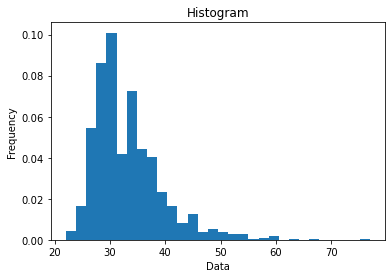

In [55]:
# YOUR CODE GOES HERE
def play_game_exact_end(length:int, snake_ladder_list)->int:
    ladder_dict={}
    snake_dict={}
    #goal = length*length
    size = int(length**(0.5))
    board = numpy.zeros([size,size])

    while snake_ladder_list:
        snake_or_ladder = snake_ladder_list.pop()
        if is_snake(snake_or_ladder):
            snake_dict[snake_or_ladder[0]]=snake_or_ladder[1]

            head_row, head_col = get_row_col(snake_or_ladder[0])
            head_row, head_col = row_col_to_fit_matrix(head_row, head_col)
            tail_row, tail_col = get_row_col(snake_or_ladder[1])
            tail_row, tail_col = row_col_to_fit_matrix(tail_row, tail_col)
            board[head_row][head_col] = 1
            board[tail_row][tail_col] = 2
        else:
            ladder_dict[snake_or_ladder[0]]=snake_or_ladder[1]

            tail_row, tail_col = get_row_col(snake_or_ladder[0])
            tail_row, tail_col = row_col_to_fit_matrix(tail_row, tail_col)
            head_row, head_col = get_row_col(snake_or_ladder[1])
            head_row, head_col = row_col_to_fit_matrix(head_row, head_col)
            board[head_row][head_col] = 3
            board[tail_row][tail_col] = 4

    counter=0
    current= 1 
    while current < length:
        die = random.randint(1,6)

        if current+die <= length:
            current+=die

        if current in ladder_dict:
            current = ladder_dict[current]
        elif current in snake_dict:
            current = snake_dict[current]

        counter+=1

    return counter

length=100
result_list=[]
for i in range(1000):
    result= play_game_exact_end(length, snake_ladder_list)
    result_list.append(result)
    #print('number of rolls:',play_game(length))

plt.hist(result_list, density=True, bins=30)
plt.ylabel("Frequency")
plt.xlabel("Data")
plt.title("Histogram");

# QUESTION 5 (ADVANCED) - 2 points 

In this question the goal is to perform exact probabilistic inference for the number of rolls. Rather than simulating the game and recording the number of moves you will need to compute systematically the probabilities of every possible sequence of rolls. You should use the simplified version of board movement with no snakes and ladders and the simple landing rule. As an example let's consider a very short board of 4 squares. The only sequence of 1 roll that finishes the game is rolling a 4 which has $P(4) = 1/6$. For two rolls we have more possibilities such as 1,3 or 3,1 or 2,2 or 2,3 or 3,2 etc. For example the probability of (1,3) is $P(1,3) = 1/6 * 1/6$. Your code should systematically calculate the right products and sums to come up with probabilities for 
each possible number of rolls. To make this a bit simpler consider a board of length $25$. I advise that you first start by looking at very short boards and checking some of the calculations by hand. 

Compare the results you get from exact inference with the results you get from approximate inference for the same board length. 

In [56]:
# YOUR CODE GOES HERE 
import itertools
DICE=[1,2,3,4,5,6]
def probability(length:int, num_dice:int)->float:
    counter=0
    for combi in itertools.product(DICE, repeat=num_dice):
        if sum(combi) >= length:
            counter+=1
    return counter/(6**num_dice)

length=25
number_of_dice=5
print("probability by exact inference of board length: ", length
      , " with:", number_of_dice, " dice is:", probability(length, number_of_dice))

probability by exact inference of board length:  25  with: 5  dice is: 0.032407407407407406


# Extra ideas (no credit) 

* Implement a GUI for showing the snakes/ladders board and support multiple players 


# Question 6 (Basic)  - 2 points



<img src="dispnea.png">

Using the convetions for DBNs used in probability.ipynb (from the AIMA authors) encode the diapnea network shown above. Once you have constructed the Bayesian network display the cpt for the Lung Cancer Node (using the API provided not just showing the numbers).

The cell below contains the code that defined BayesNodes and BayesNetworks and the following cell 
shows an example of defining the Burglary network and performing a query using direct enumeration. 


In [57]:
import numpy as np 
import random 

def extend(s, var, val):
    """Copy dict s and extend it by setting var to val; return copy."""
    return {**s, var: val}

def event_values(event, variables):                                                                      
    """Return a tuple of the values of variables in event.                                               
    >>> event_values ({'A': 10, 'B': 9, 'C': 8}, ['C', 'A'])                                             
    (8, 10)                                                                                              
    >>> event_values ((1, 2), ['C', 'A'])                                                                
    (1, 2)                                                                                               
    """                                                                                                  
    if isinstance(event, tuple) and len(event) == len(variables):                                        
        return event                                                                                     
    else:                                                                                                
        return tuple([event[var] for var in variables])                                                  
                      
def probability(p):                                                                                      
    """Return true with probability p."""                                                                
    return p > random.uniform(0.0, 1.0)  
        
class ProbDist:
    """A discrete probability distribution. You name the random variable
    in the constructor, then assign and query probability of values.
    >>> P = ProbDist('Flip'); P['H'], P['T'] = 0.25, 0.75; P['H']
    0.25
    >>> P = ProbDist('X', {'lo': 125, 'med': 375, 'hi': 500})
    >>> P['lo'], P['med'], P['hi']
    (0.125, 0.375, 0.5)
    """

    def __init__(self, var_name='?', freq=None):
        """If freq is given, it is a dictionary of values - frequency pairs,
        then ProbDist is normalized."""
        self.prob = {}
        self.var_name = var_name
        self.values = []
        if freq:
            for (v, p) in freq.items():
                self[v] = p
            self.normalize()

    def __getitem__(self, val):
        """Given a value, return P(value)."""
        try:
            return self.prob[val]
        except KeyError:
            return 0

    def __setitem__(self, val, p):
        """Set P(val) = p."""
        if val not in self.values:
            self.values.append(val)
        self.prob[val] = p

    def normalize(self):
        """Make sure the probabilities of all values sum to 1.
        Returns the normalized distribution.
        Raises a ZeroDivisionError if the sum of the values is 0."""
        total = sum(self.prob.values())
        if not np.isclose(total, 1.0):
            for val in self.prob:
                self.prob[val] /= total
        return self

    def show_approx(self, numfmt='{:.3g}'):
        """Show the probabilities rounded and sorted by key, for the
        sake of portable doctests."""
        return ', '.join([('{}: ' + numfmt).format(v, p) for (v, p) in sorted(self.prob.items())])

    def __repr__(self):
        return "P({})".format(self.var_name)


class BayesNode:
    """A conditional probability distribution for a boolean variable,
    P(X | parents). Part of a BayesNet."""

    def __init__(self, X, parents, cpt):
        """X is a variable name, and parents a sequence of variable
        names or a space-separated string. cpt, the conditional
        probability table, takes one of these forms:

        * A number, the unconditional probability P(X=true). You can
          use this form when there are no parents.

        * A dict {v: p, ...}, the conditional probability distribution
          P(X=true | parent=v) = p. When there's just one parent.

        * A dict {(v1, v2, ...): p, ...}, the distribution P(X=true |
          parent1=v1, parent2=v2, ...) = p. Each key must have as many
          values as there are parents. You can use this form always;
          the first two are just conveniences.

        In all cases the probability of X being false is left implicit,
        since it follows from P(X=true).

        >>> X = BayesNode('X', '', 0.2)
        >>> Y = BayesNode('Y', 'P', {T: 0.2, F: 0.7})
        >>> Z = BayesNode('Z', 'P Q',
        ...    {(T, T): 0.2, (T, F): 0.3, (F, T): 0.5, (F, F): 0.7})
        """
        if isinstance(parents, str):
            parents = parents.split()

        # We store the table always in the third form above.
        if isinstance(cpt, (float, int)):  # no parents, 0-tuple
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # one parent, 1-tuple
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v,): p for v, p in cpt.items()}

        assert isinstance(cpt, dict)
        for vs, p in cpt.items():
            assert isinstance(vs, tuple) and len(vs) == len(parents)
            assert all(isinstance(v, bool) for v in vs)
            assert 0 <= p <= 1

        self.variable = X
        self.parents = parents
        self.cpt = cpt
        self.children = []

    def p(self, value, event):
        """Return the conditional probability
        P(X=value | parents=parent_values), where parent_values
        are the values of parents in event. (event must assign each
        parent a value.)
        >>> bn = BayesNode('X', 'Burglary', {T: 0.2, F: 0.625})
        >>> bn.p(False, {'Burglary': False, 'Earthquake': True})
        0.375"""
        assert isinstance(value, bool)
        ptrue = self.cpt[event_values(event, self.parents)]
        return ptrue if value else 1 - ptrue

    def sample(self, event):
        """Sample from the distribution for this variable conditioned
        on event's values for parent_variables. That is, return True/False
        at random according with the conditional probability given the
        parents."""
        return probability(self.p(True, event))

    def __repr__(self):
        return repr((self.variable, ' '.join(self.parents)))
    
    
class BayesNet:
    """Bayesian network containing only boolean-variable nodes."""

    def __init__(self, node_specs=None):
        """Nodes must be ordered with parents before children."""
        self.nodes = []
        self.variables = []
        node_specs = node_specs or []
        for node_spec in node_specs:
            self.add(node_spec)

    def add(self, node_spec):
        """Add a node to the net. Its parents must already be in the
        net, and its variable must not."""
        node = BayesNode(*node_spec)
        assert node.variable not in self.variables
        assert all((parent in self.variables) for parent in node.parents)
        self.nodes.append(node)
        self.variables.append(node.variable)
        for parent in node.parents:
            self.variable_node(parent).children.append(node)

    def variable_node(self, var):
        """Return the node for the variable named var.
        >>> burglary.variable_node('Burglary').variable
        'Burglary'"""
        for n in self.nodes:
            if n.variable == var:
                return n
        raise Exception("No such variable: {}".format(var))

    def variable_values(self, var):
        """Return the domain of var."""
        return [True, False]

    def __repr__(self):
        return 'BayesNet({0!r})'.format(self.nodes)
    
    
def enumerate_all(variables, e, bn):
    """Return the sum of those entries in P(variables | e{others})
    consistent with e, where P is the joint distribution represented
    by bn, and e{others} means e restricted to bn's other variables
    (the ones other than variables). Parents must precede children in variables."""
    if not variables:
        return 1.0
    Y, rest = variables[0], variables[1:]
    Ynode = bn.variable_node(Y)
    if Y in e:
        return Ynode.p(e[Y], e) * enumerate_all(rest, e, bn)
    else:
        return sum(Ynode.p(y, e) * enumerate_all(rest, extend(e, Y, y), bn)
                   for y in bn.variable_values(Y))

def enumeration_ask(X, e, bn):
    """
    [Figure 14.9]
    Return the conditional probability distribution of variable X
    given evidence e, from BayesNet bn.
    >>> enumeration_ask('Burglary', dict(JohnCalls=T, MaryCalls=T), burglary
    ...  ).show_approx()
    'False: 0.716, True: 0.284'"""
    assert X not in e, "Query variable must be distinct from evidence"
    Q = ProbDist(X)
    for xi in bn.variable_values(X):
        Q[xi] = enumerate_all(bn.variables, extend(e, X, xi), bn)
    return Q.normalize()

def consistent_with(event, evidence):
    """Is event consistent with the given evidence?"""
    return all(evidence.get(k, v) == v for k, v in event.items())

def prior_sample(bn):
    """
    [Figure 14.13]
    Randomly sample from bn's full joint distribution.
    The result is a {variable: value} dict.
    """
    event = {}
    for node in bn.nodes:
        event[node.variable] = node.sample(event)
    return event

def rejection_sampling(X, e, bn, N=10000):
    """
    [Figure 14.14]
    Estimate the probability distribution of variable X given
    evidence e in BayesNet bn, using N samples.
    Raises a ZeroDivisionError if all the N samples are rejected,
    i.e., inconsistent with e.
    >>> random.seed(47)
    >>> rejection_sampling('Burglary', dict(JohnCalls=T, MaryCalls=T),
    ...   burglary, 10000).show_approx()
    'False: 0.7, True: 0.3'
    """
    counts = {x: 0 for x in bn.variable_values(X)}  # bold N in [Figure 14.14]
    for j in range(N):
        sample = prior_sample(bn)  # boldface x in [Figure 14.14]
        if consistent_with(sample, e):
            counts[sample[X]] += 1
    return ProbDist(X, counts)

def weighted_sample(bn, e):
    """
    Sample an event from bn that's consistent with the evidence e;
    return the event and its weight, the likelihood that the event
    accords to the evidence.
    """
    w = 1
    event = dict(e)  # boldface x in [Figure 14.15]
    for node in bn.nodes:
        Xi = node.variable
        if Xi in e:
            w *= node.p(e[Xi], event)
        else:
            event[Xi] = node.sample(event)
    return event, w

def likelihood_weighting(X, e, bn, N=10000):
    """
    [Figure 14.15]
    Estimate the probability distribution of variable X given
    evidence e in BayesNet bn.
    >>> random.seed(1017)
    >>> likelihood_weighting('Burglary', dict(JohnCalls=T, MaryCalls=T),
    ...   burglary, 10000).show_approx()
    'False: 0.702, True: 0.298'
    """
    W = {x: 0 for x in bn.variable_values(X)}
    for j in range(N):
        sample, weight = weighted_sample(bn, e)  # boldface x, w in [Figure 14.15]
        W[sample[X]] += weight
    return ProbDist(X, W)


In [58]:
   burglary = BayesNet([
        ('Burglary', '', 0.001),
        ('Earthquake', '', 0.002),
        ('Alarm', 'Burglary Earthquake',
         {(True, True): 0.95, (True, False): 0.94, (False, True): 0.29, (False, False): 0.001}),
        ('JohnCalls', 'Alarm', {True: 0.90, False: 0.05}),
        ('MaryCalls', 'Alarm', {True: 0.70, False: 0.01})
    ])
    
print(burglary.variable_node('Alarm').cpt)
ans_dist = enumeration_ask('Burglary', {'JohnCalls': True, 'MaryCalls': True}, burglary)
print(ans_dist[True],ans_dist[False])


p = rejection_sampling('Burglary', dict(JohnCalls=True, MaryCalls=True), burglary, 10000)
print(p[True])

likelihood_weighting('Burglary', dict(JohnCalls=True, MaryCalls=True),burglary, 10000).show_approx()

{(True, True): 0.95, (True, False): 0.94, (False, True): 0.29, (False, False): 0.001}
0.2841718353643929 0.7158281646356071
0.4090909090909091


'False: 0.604, True: 0.396'

In [59]:
# YOUR CODE GOES HERE 

dispnea_network = BayesNet([
        ('VisitAsia', '', 0.01),
        ('Smoker', '', 0.5),
        ('Tuberculuous', 'VisitAsia', {True: 0.05, False: 0.01}),
        ('LungCancer', 'Smoker', {True: 0.1, False: 0.01}),
        ('Bronchitis', 'Smoker', {True: 0.6, False: 0.3}),
        ('EitherTorL', 'Tuberculuous LungCancer',
         {(True, True): 1.00, (True, False): 1.00, (False, True): 1.00, (False, False): 0}),
        ('Xray', 'EitherTorL', {True: 0.98, False: 0.05}),
        ('Dispnea', 'EitherTorL Bronchitis',
         {(True, True): 0.9, (True, False): 0.7, (False, True): 0.8, (False, False): 0.1})
    ])

print('P(LungCancer|Smoker)=',dispnea_network.variable_node('LungCancer').cpt)



P(LungCancer|Smoker)= {(True,): 0.1, (False,): 0.01}


# Question 7 (Expected) 2 points 

Answer using exact inference with enumeration the following query: given that a patient has been in Asia and has a positive xray, what is the likelihood of having dispnea?
Write code for this same query using enumeration_ask. 
Answer using approximate inference the same query using both rejection sampling and likelihood weighting.

In [60]:
# YOUR CODE GOES HERE 
p = rejection_sampling('Dispnea',dict(Asia = True,Positive_X_Ray = True),dispnea_network,10000)
print(p[True])

p = likelihood_weighting('Dispnea',dict(Asia = True,Positive_X_Ray = True),dispnea_network,10000).show_approx()
print(p)

0.4335
False: 0.556, True: 0.444


 # Question 8 (Basic) -2 points


The next three question explore hidden markov models (HMMs) and use the hmmlearn Python library. You can use the code for the weather example in the probabilistic reasoning over time notebook we covered in class as a template for writing your code. 

The problem used in inspired by the use of HMMs in bioinformatics. 
There are several simplifications made to make it reasonable as part of an assignment. DNA sequences can be considered strings over an alphabet of 4 symbols/nucleobases **A,C,T,G (adenine, cytosine, thymine, guanine**. Parts of a DNA sequence are dense with C and G and other parts are sparse with C and G and it is of interest to biologists to identify these regions. 

We will model the **CG-dense**(CGD) and **CG-sparse** (CGS) as hidden states and the nucleobases are the observations. Through experimental data we have the following information: 

1. The transition probability from CGD to CGS is 0.37 and the probability of staying in CGD is 0.63. The transition probability from CGS to CGD is similarly 0.37 with 0.63 being the probability of staying in CGS. 

2. The observation probabilities of CGD regions are: A: 0.15, C:0.35, G: 0.35, and T:0.15. The observation probabilities of CGS regions are: A: 0.40, C: 0.10, G: 0.10, T: 0.40 

3. You can assume that the initial state probabilities are the same (0.5) 

4. For visualization of the DNA sequences use the following color mapping: A: red, C: green, T: blue, G: yellow, and for CGD: black 
and CGS: white 


Define this HMM model using the **hmmlearn** conventions. Then use the created model to generate a sequence of 1000 samples (i.e both hidden states and corresponding observations). Use the colors above 
to visualize the sequence of samples. 


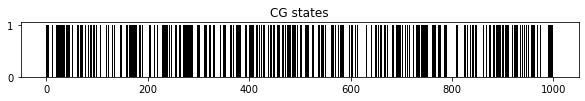

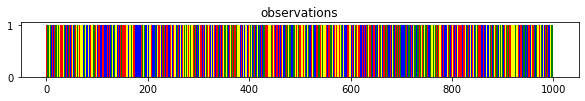

In [61]:
# Your answer goes here 
!pip3 install matplotlib
!pip3 install hmmlearn
import matplotlib.pyplot as plt
#from scipy import stats
import numpy as np
from hmmlearn import hmm

from typing import List
class Random_Variable: 
    
    def __init__(self, name, values: List[str], probability_distribution: List[float]): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 
        
    def probs(self): 
        return self.probability_distribution
    
    def vals(self): 
        print(self.type)
        return self.values 

def markov_chain(transition_matrix, state, state_names, samples): 
    (rows, cols) = transition_matrix.shape 
    random_vars = [] 
    values = list(np.arange(0,rows))
    
    # create random variables for each row of transition matrix 
    for r in range(rows): 
        random_var = Random_Variable("row" + str(r), values, transition_matrix[r])
        random_vars.append(random_var)
    
    # start from initial state and then sample the appropriate 
    # random variable based on the state following the transitions 
    states = [] 
    for n in range(samples): 
        state = random_vars[state].sample(1)[0]    
        states.append(state_names[state])
    return states

def plot_weather_samples(samples, state2color, title: str): 
    colors = [state2color[x] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)
    plt.title(title)
    
#1.create random variables
random_vars = ['A', 'C', 'G', 'T']

#2.setup hidden states and their transition matrix
start_prob_dense_or_sparse = np.array([0.5, 0.5])
transition_matrix = np.array([[0.63, 0.37], [0.37, 0.63]])

# cg_dense has high probs for C and G 
emission_probs = np.array([[0.15, 0.35, 0.35, 0.15], 
                           [0.4, 0.1, 0.1, 0.4]])

#3. Finally, create a model.
model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = start_prob_dense_or_sparse 
model.transmat_ = transition_matrix 
model.emissionprob_ = emission_probs

evidence, hidden_state = model.sample(1000)

state2color = {} 
state2color[0] = 'black' #CG dense
state2color[1] = 'white' #CG sparse
plot_weather_samples(hidden_state, state2color, 'CG states')

samples = [item for sublist in evidence for item in sublist]
obj2color = {} 
obj2color[0] = 'red' #A
obj2color[1] = 'green' #C
obj2color[2] = 'yellow' #G
obj2color[3] = 'blue' #T
plot_weather_samples(samples, obj2color, 'observations')

# Question 9 (Expected) - 2 points

Generate 10000 samples using the defined hmm for generating DNA sequences. Learn the HMM in an unsupervised fashion similarly to what we did with the weather example i.e only use the observation samples not the "hidden" states for estimating the model using the fit function. Constrast the original HMM to the HMM estimated from the data by comparing the transition and observation matrices. 


In [62]:
# Your answer goes here 
transmat = np.array([[0.63, 0.37], [0.37, 0.63]])
start_prob = np.array([0.5, 0.5])
emission_probs = np.array([[0.15, 0.35, 0.35, 0.15], [0.4, 0.10, 0.10, 0.4]])
model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.emissionprob_ = emission_probs
X, Z = model.sample(10000)
estimated_model = hmm.MultinomialHMM(n_components=2, n_iter=10000).fit(X)

print("Transition matrix")
print("Estimated model:")
print(estimated_model.transmat_)
print("Original model:")
print(model.transmat_)
print("Emission probabilities")
print("Estimated model")
print(estimated_model.emissionprob_)
print("Original model")
print(model.emissionprob_)

Transition matrix
Estimated model:
[[0.67993596 0.32006404]
 [0.35806549 0.64193451]]
Original model:
[[0.63 0.37]
 [0.37 0.63]]
Emission probabilities
Estimated model
[[0.40039788 0.10198442 0.10744988 0.39016782]
 [0.12374894 0.36638457 0.35497658 0.15488992]]
Original model
[[0.15 0.35 0.35 0.15]
 [0.4  0.1  0.1  0.4 ]]


# Question 10 (Advanced) - 2 points 

This question is a bit more open ended, will require some creativity and extra work. Consider the following problem: during your day your cell phone collects location data in terms of x,y coordinates. You do different activities such as going to university, eating, going to the gym. These activities take place in particular locations such as Restaurant A and Restaurant B or Gym A, Gym B and each particular location can be thought of as a two-dimensional Gaussian distribution of location points. If you consider the activity as the hidden state and the location as the observation you have a Hidden Markov Model. Because activities take place in multiple locations you can model this as a Gaussian Mixture Model (GMM). Each Gaussian will be multivariate 2D Gaussian distribution characterized by two means and and a 2 by 2 covariance matrix.

Consider a hypothetical scenario with 3 activities (eat, study, exercise) and 3 locations (GMM components) for each activity. You will need to do some reading about how GMMs work. You can come up with reasonable estimates for the associated parameters.

Basically the goal is the follow the format of the Markov Chain and HMM notebook and create appropriate visualizations using this problem.

Visualize on a 2D plane using circles the different locations and corresponding mixture components Generate a dataset using a Hidden Markov Model of the problem Visualize the dataset on a 2D plane Show how you can learn the parameters of this HMM using https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn.hmm.GMMHMM

In [63]:
from hmmlearn.base import ConvergenceMonitor
from hmmlearn import hmm

In [64]:
class ThresholdMonitor(ConvergenceMonitor):
    @property
    def converged(self):
        return (self.iter == self.n_iter or
                self.history[-1] >= self.tol)

In [65]:
hmm.GMMHMM(n_components=1, n_mix=1, min_covar=0.001, 
           startprob_prior=1.0, transmat_prior=1.0, weights_prior=1.0, 
           means_prior=0.0, means_weight=0.0, covars_prior=None, covars_weight=None,
           algorithm='viterbi', covariance_type='diag', random_state=None, n_iter=10, tol=0.01,
           verbose=False, params='stmcw', init_params='stmcw', implementation='log')

GMMHMM()